In [3]:
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import LambdaCDM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from uncertainties import unumpy

from astromodelling2_functions import *

# Part A - Measuring redshifts from spectra

In [4]:
sol = 3e5 # Speed of light in km/s
halpha = 6563 # Rest wavelength of Halpha

In [5]:
spectra_paths = get_filepaths('Data_for_upload/SN_spectra') #filepaths to supernovae spectra
spectra_paths.pop(1)   #getting rid of the .DS_store filepath
spectra_paths.sort()


sn_names = np.char.replace(spectra_paths, 'Data_for_upload/SN_spectra/', '' )
sn_names = np.char.replace(sn_names, '_spec.ascii', '') #list of supernovae names

sn_names = list(sn_names)
print(sn_names)

['sn1997E', 'sn1997bp', 'sn1998bp', 'sn1998es', 'sn1999aa', 'sn1999gp', 'sn2000cn', 'sn2000dk']


In [6]:
wl, flux = [], []  #defining empty lists to store wavelength and flux for each SN

#looping over filepaths to each SN spectrum
for i in range(len(spectra_paths)):
    x, y = np.loadtxt(spectra_paths[i], unpack = 1) 
    wl.append(x), flux.append(y/y.max()) #adding wl and (normalised) flux into the lists


wl = np.array(wl, dtype = object)  #converting lists into numpy arrays
flux = np.array(flux, dtype = object)

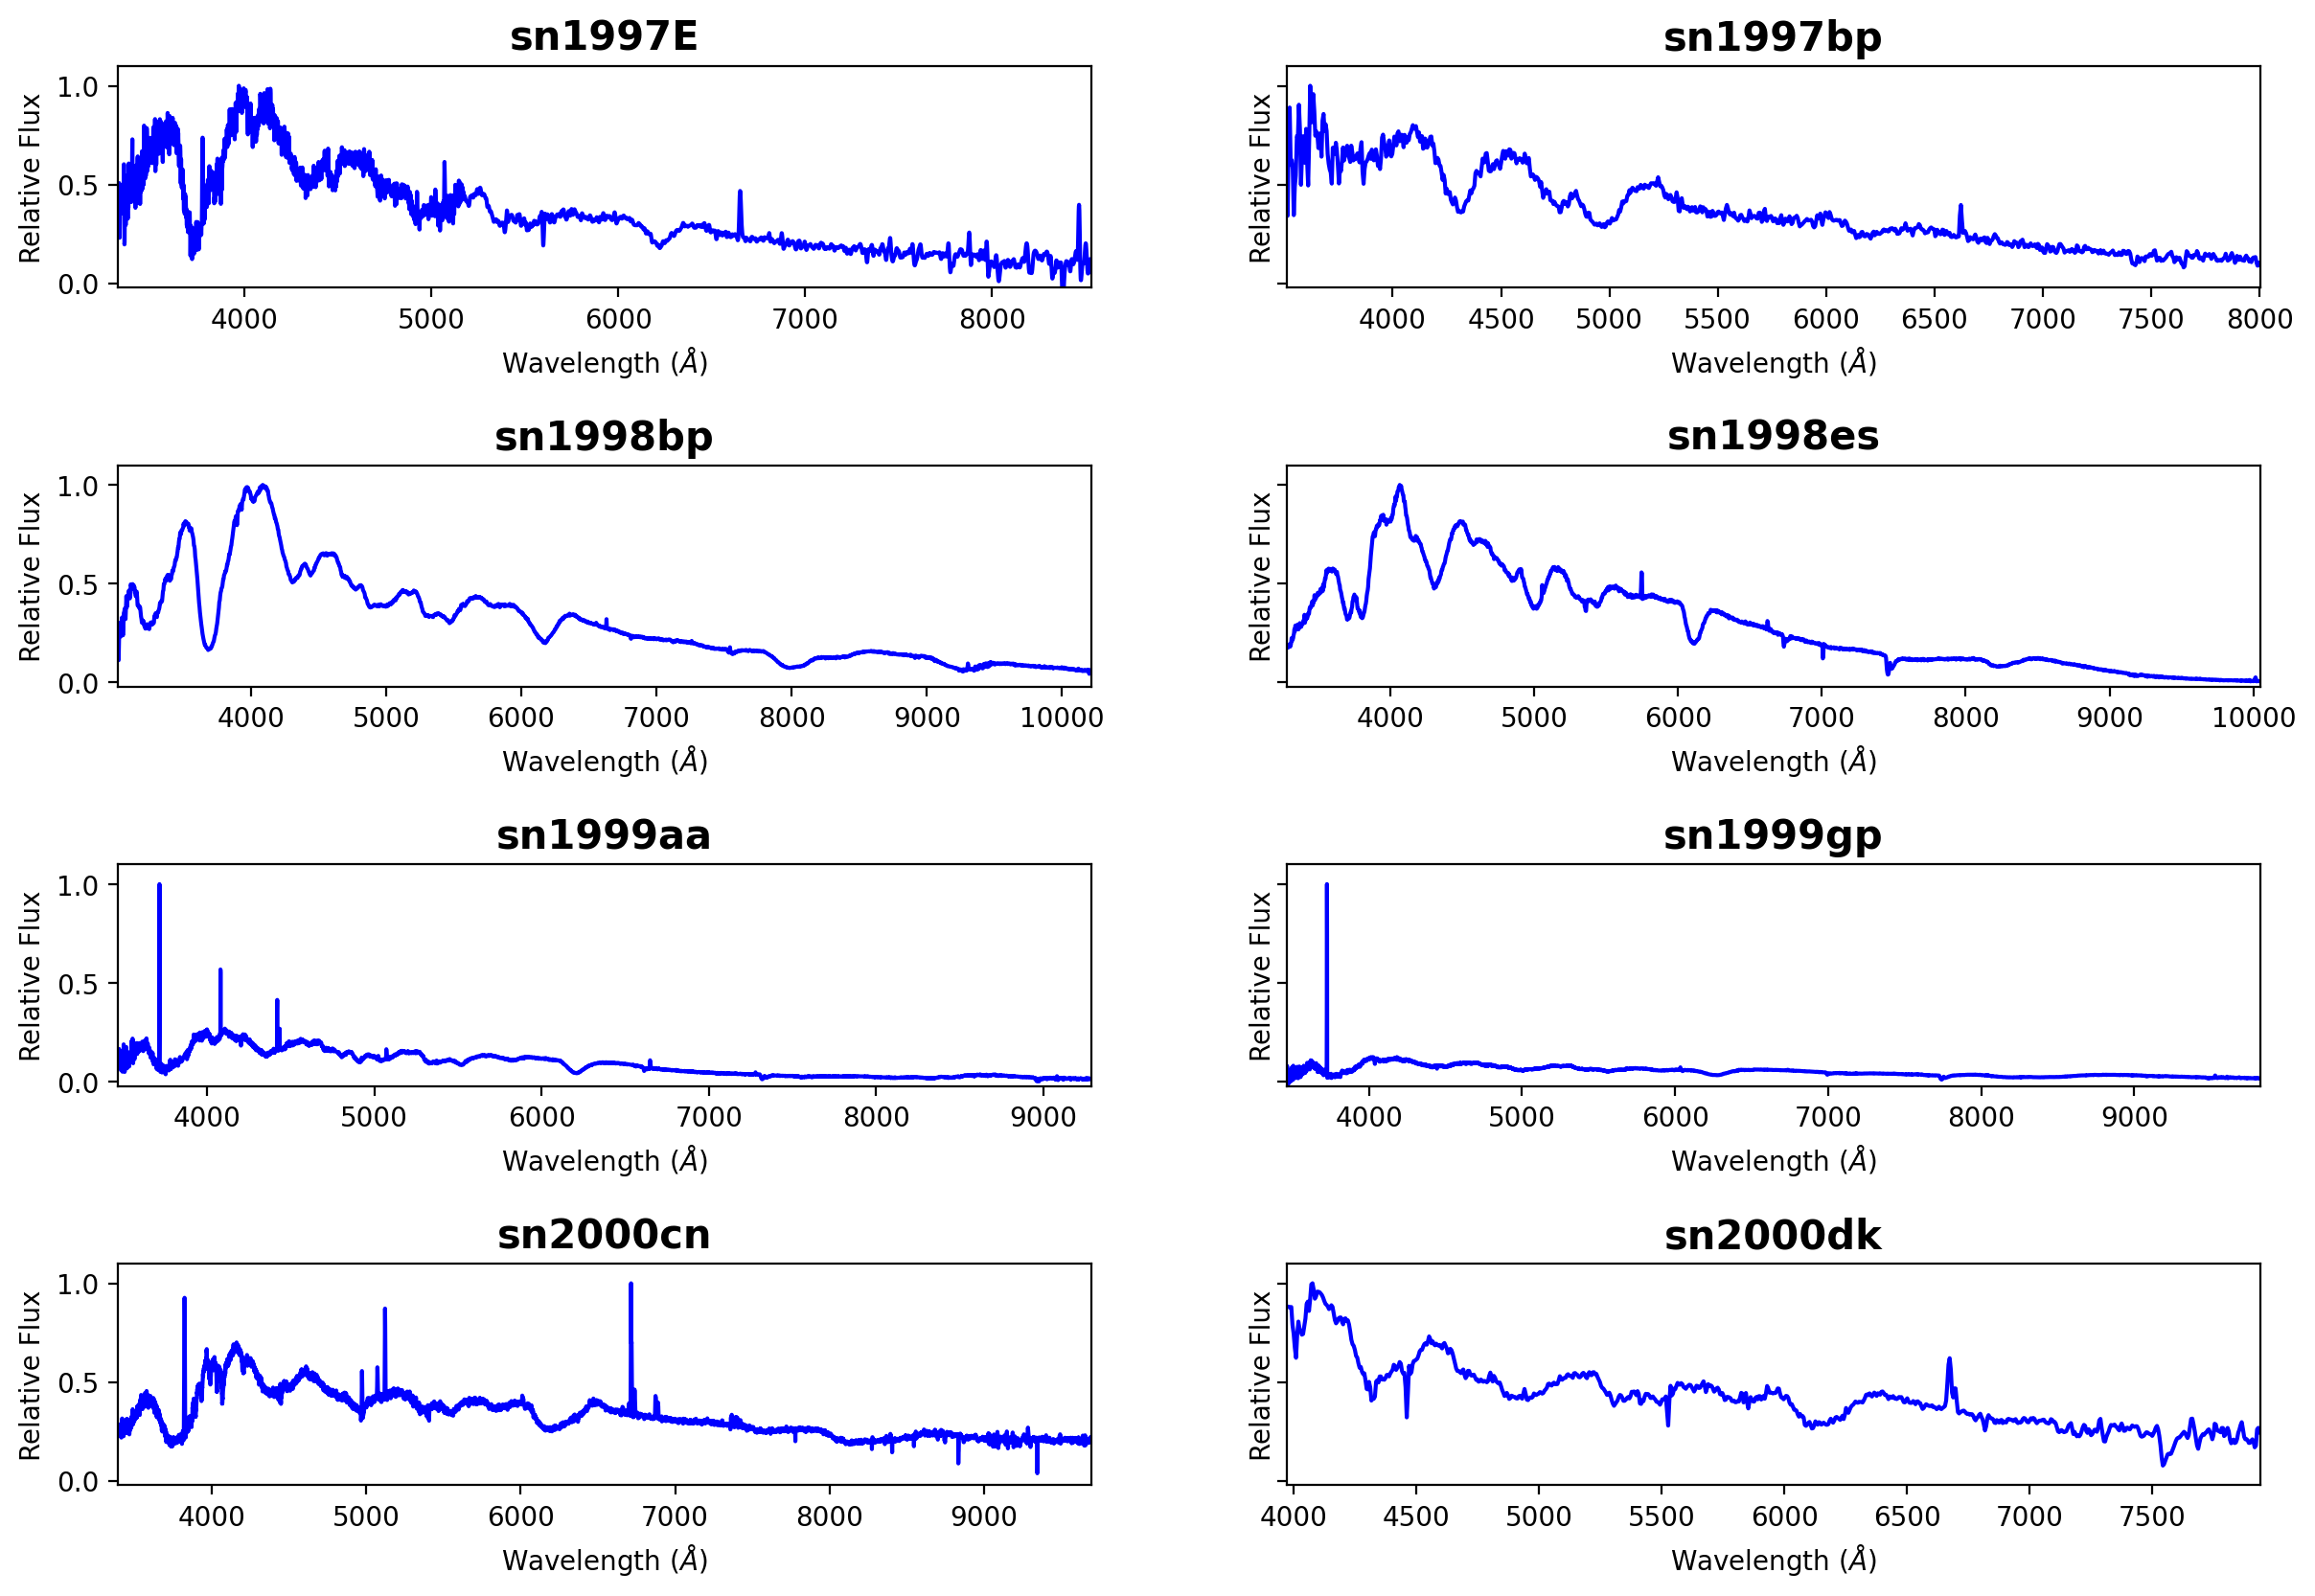

In [7]:
#plotting all spectra in order to identify emission and absorption features
fig1, ax = plt.subplots(nrows = len(spectra_paths)//2, ncols = len(spectra_paths)//4, figsize = (12,8), sharey = True, dpi = 200)
ax = ax.flatten()
plt.tight_layout()
fig1.subplots_adjust(hspace = 0.8, wspace = 0.2)

#looping over all file paths and plotting each spectrum
for i in range(len(sn_names)):
    spectra_plot(ax, i, sn_names, wl, flux)

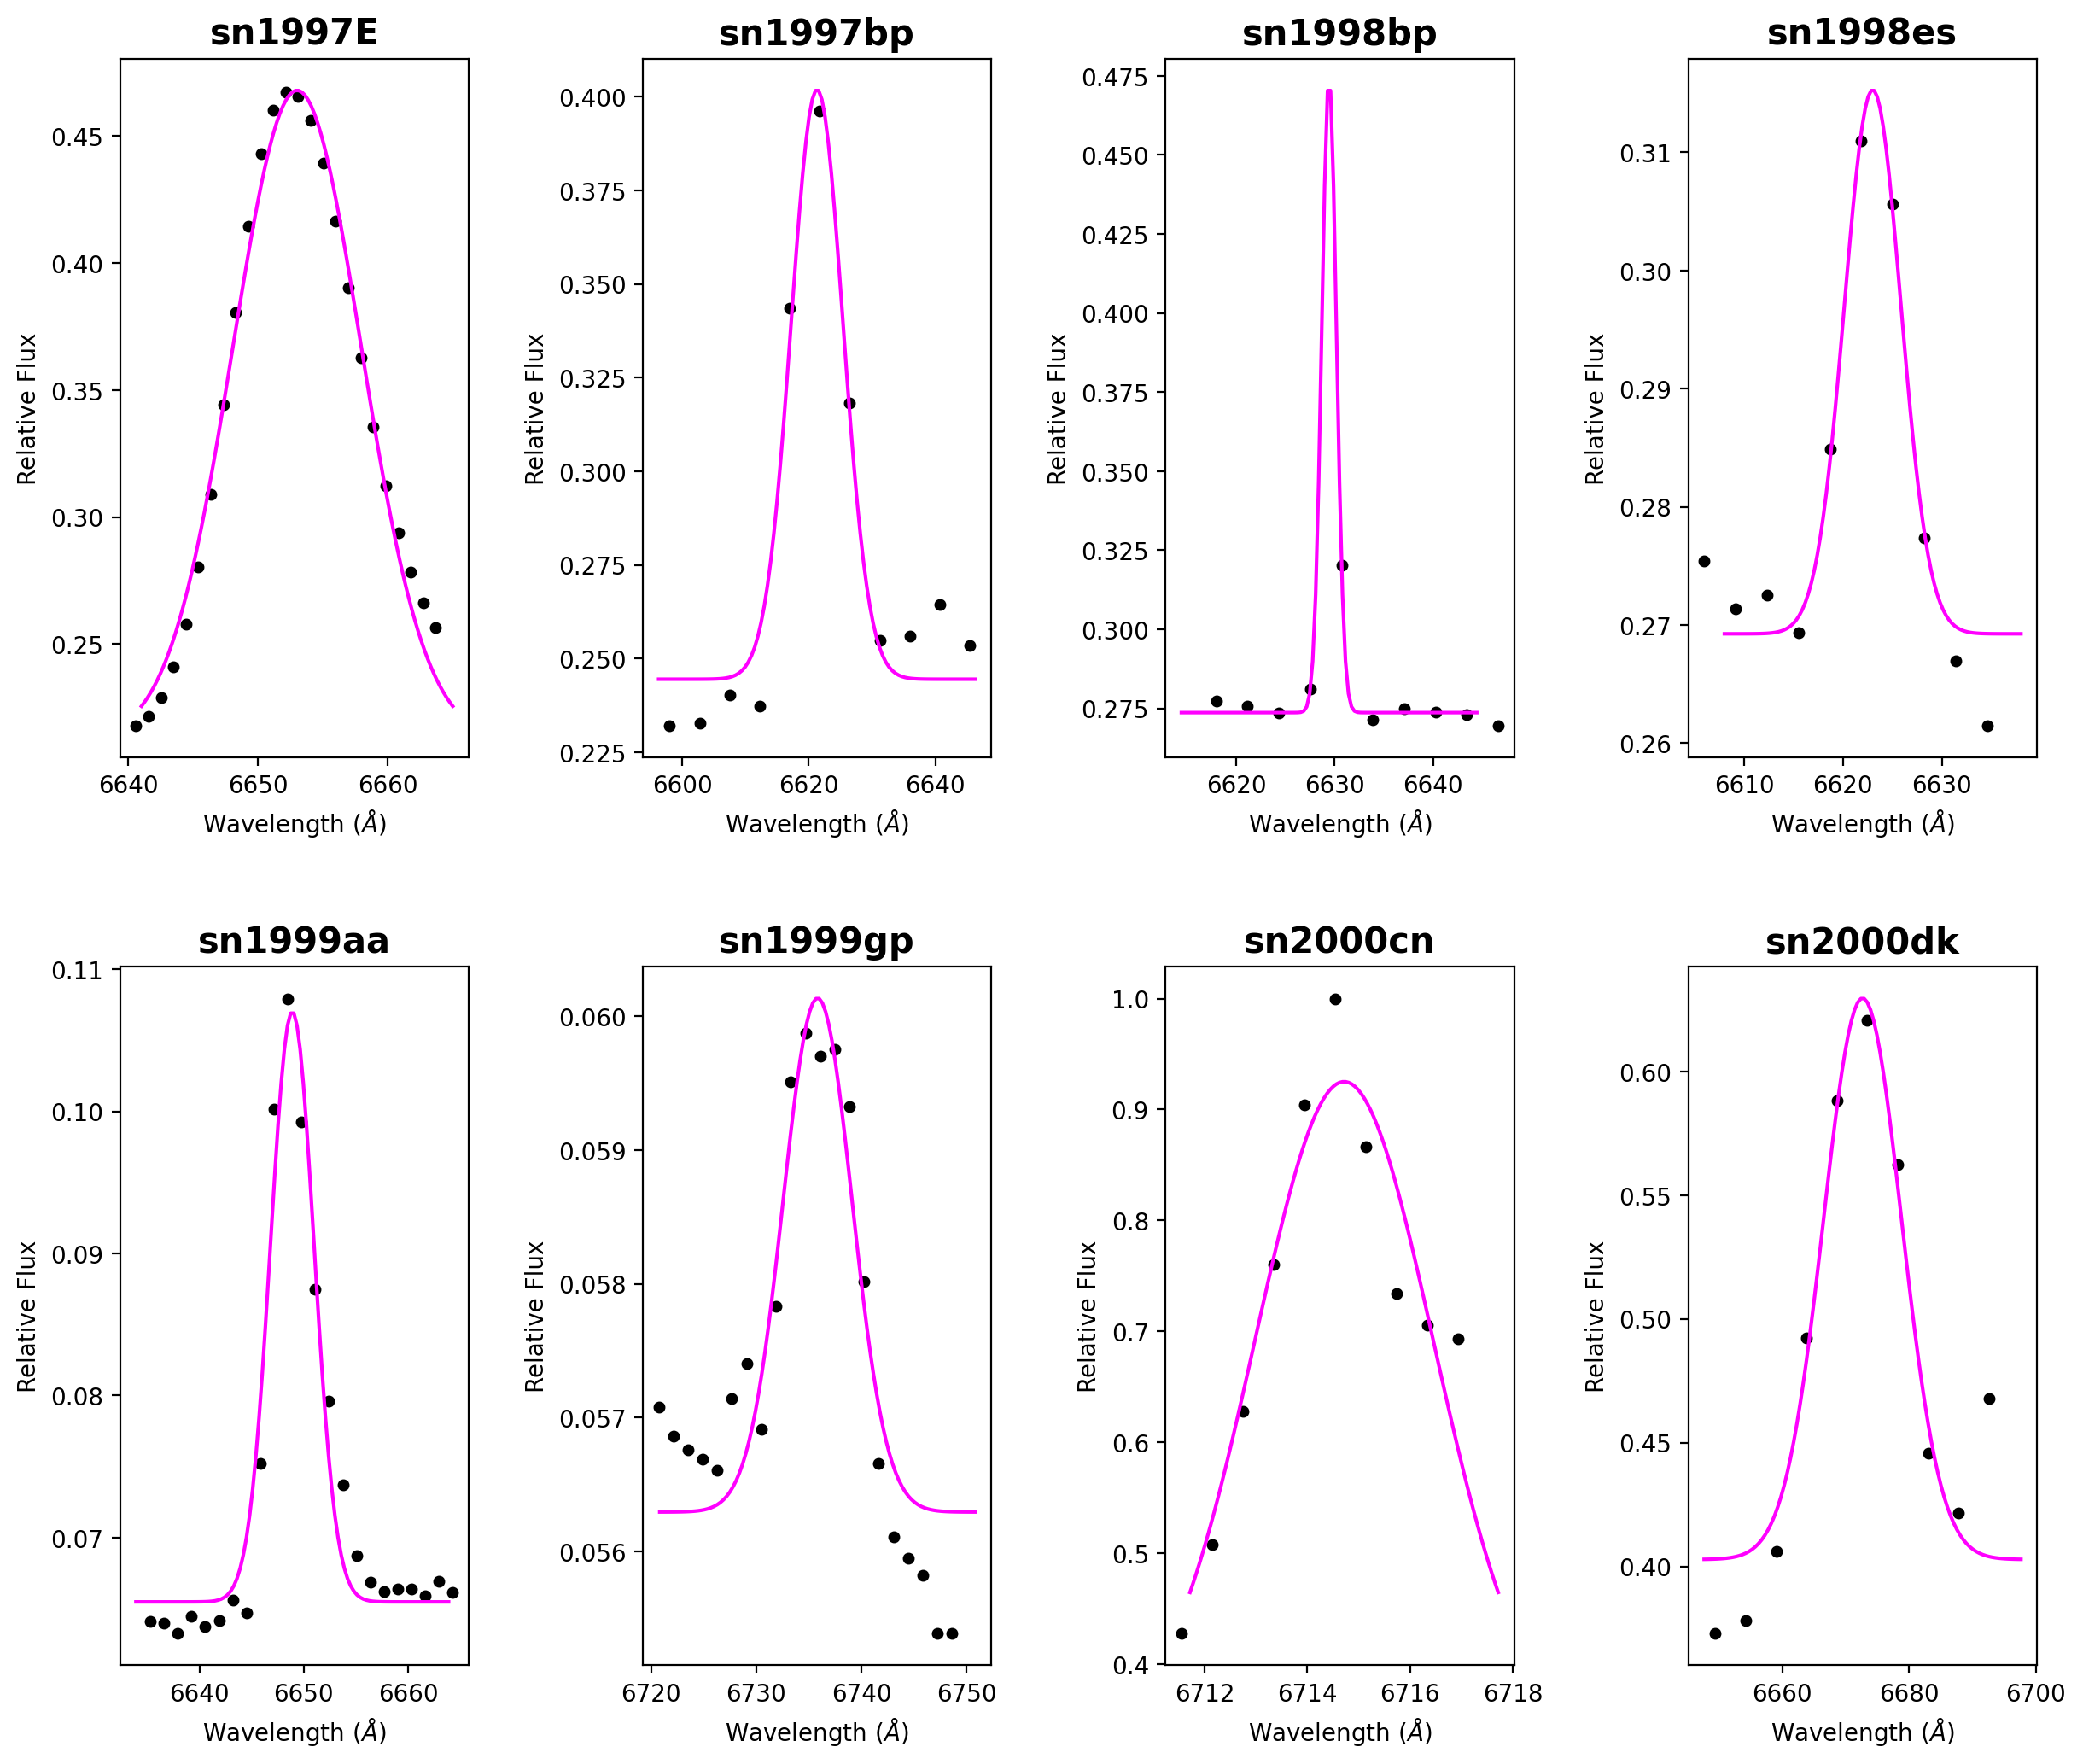

In [8]:
halpha_guess = np.array([6652,  6622, 6632.5, 6620, 6650,  6735, 6714.5, 6670]) #guess for h alpha peak wavelength
fit_range = [12, 25, 15, 15, 15, 15, 3, 25] #range for which to fit each peak

halpha_means = np.zeros(len(halpha_guess)) #empty numpy arrays to store means and errors of peaks
halpha_error = np.zeros(len(halpha_guess))

#setting up plot figure
fig2, ax = plt.subplots(nrows = len(spectra_paths)//4, ncols = len(spectra_paths)//2, figsize = (12,10), dpi = 200)
ax = ax.flatten()
plt.tight_layout()
fig2.subplots_adjust(hspace = 0.3, wspace = 0.5)


#looping over all spectra to get mean, error and plot of fit for each halpha line
for i in range(len(halpha_guess)):
    # halpha_guess, fit_range, wl, flux, halpha_means, halpha_error, sn_names, 
    inputs = {'wl': wl, 'flux': flux, 'halpha_guess': halpha_guess, 'halpha_means': halpha_means,'fit_range': fit_range, 'sn_names': sn_names, 'halpha_error': halpha_error}
    halpha_means[i], halpha_error[i] = halpha_fit(ax, i, plot = True, **inputs)

In [9]:
redshifts, error_redshifts = redshift(halpha_means, halpha, halpha_error) #finding redshifts and errors

error_redshifts[2] = error_redshifts[2]*2 #increasing error for this spectrum to 2sigma from 1sigma

error_redshifts += 0.001 #increasing error in redshifts to take account of systematic error



In [10]:
print("H-alpha wavelength and redshift for each supernova:", "\n")
print("Name:", "\t\t", "H-alpha Wavelength:",  "\t\t", "Redshift:")
print("=="*32)
for i in range(len(redshifts)):
    print(sn_names[i] + ":" , "\t", f"{unumpy.uarray(halpha_means, halpha_error)[i]:.1f}", "Angstrom", "\t\t", f"{unumpy.uarray(redshifts, error_redshifts)[i]:.3f}")

H-alpha wavelength and redshift for each supernova: 

Name: 		 H-alpha Wavelength: 		 Redshift:
sn1997E: 	 6653.0+/-4.9 Angstrom 		 0.014+/-0.002
sn1997bp: 	 6621.3+/-4.1 Angstrom 		 0.009+/-0.002
sn1998bp: 	 6629.4+/-0.7 Angstrom 		 0.010+/-0.001
sn1998es: 	 6623.0+/-2.9 Angstrom 		 0.009+/-0.001
sn1999aa: 	 6648.9+/-2.1 Angstrom 		 0.013+/-0.001
sn1999gp: 	 6735.8+/-3.3 Angstrom 		 0.026+/-0.001
sn2000cn: 	 6714.7+/-1.7 Angstrom 		 0.023+/-0.001
sn2000dk: 	 6672.7+/-6.1 Angstrom 		 0.017+/-0.002


# Part B - Measuring properties of SN Ia lightcurves

In [11]:
redshifts[5] = 0.014  #replacing redshift of sn1999gp with given redshift of sn1999dq
error_redshifts[5] = 0.00102 #replacing error in redshift of sn1999gp with given redshift of sn1999dq

updated_names = list(np.char.replace(sn_names, 'gp', 'dq'))  #updating SN names with correct name
print(updated_names)

['sn1997E', 'sn1997bp', 'sn1998bp', 'sn1998es', 'sn1999aa', 'sn1999dq', 'sn2000cn', 'sn2000dk']


In [12]:
lc_paths = get_filepaths('Data_for_upload/SN_lightcurves/') #finding filepaths to lightcurve data
lc_paths.pop(3) #removing .DS_store filepath
lc_paths.sort() #sorting filepaths in numerical-alphabetical order

lightcurves = []   #empty list to store lightcurve data

for i in range(len(lc_paths)):
    x = np.loadtxt(lc_paths[i])  #loading individual SN lightcurve data
    lightcurves.append(x)  #appending lc list with these individual SN lightcurve datasets

lightcurves = np.array(lightcurves, dtype = object)  #converting list into numpy array

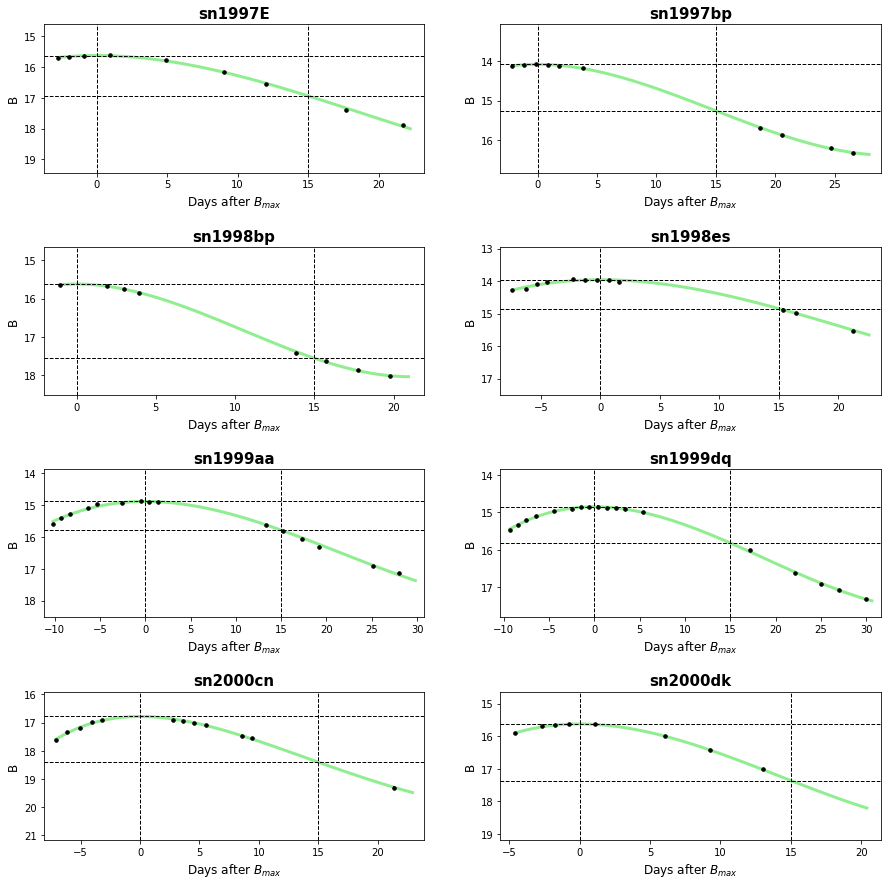

In [13]:
fit_index = [3, 3, 3, 3, 3, 3, 5, 3]  #index of each polynomial that will be fit to each lightcurve
max_times = [50, 30, 22, 55, 60, 40, 100, 50] #time range over which to fit each lightcurve
plot_range = [25, 30, 22, 30, 40, 40, 30, 25] #time range over which to plot the fit over

#setting up plot figure
fig3, ax = plt.subplots(nrows = len(lightcurves)//2, ncols = len(lightcurves)//4, figsize = (15,15))
ax = ax.flatten()
fig3.subplots_adjust(hspace=0.5)

peak_B = unumpy.uarray(np.zeros(len(lightcurves)), np.zeros(len(lightcurves)))    #unumpy array to store peak B magnitudes and errors 
m_15B = unumpy.uarray(np.zeros(len(lightcurves)), np.zeros(len(lightcurves)))    #unumpy array to store delta(m_15(B)) values and errors

#looping over all SN and plotting each lightcurve with respective fits
inputs = {'lightcurves': lightcurves, 'redshifts': redshifts, 'error_redshifts': error_redshifts, 'fit_index': fit_index, 'max_times': max_times, 'plot_range': plot_range, 'updated_names': updated_names}
for i in range(len(lightcurves)):
    peak_B[i], m_15B[i] = lc_fit(ax, i, plot = True, **inputs) #storing peak B mags and delta(m_15(B)) values in arrays

In [14]:
print("Peak B-band magnitude and delta m_15(B) for each supernova:", "\n")
print("Name", "\t\t", "Peak B Mag", "\t\t", "m_15(B)")
print("=="*26)
for i in range(len(peak_B)):
    print(updated_names[i] + ":", "\t", f"{peak_B[i]:.2f}", "\t\t",m_15B[i])

Peak B-band magnitude and delta m_15(B) for each supernova: 

Name 		 Peak B Mag 		 m_15(B)
sn1997E: 	 15.63+/-0.03 		 1.31+/-0.16
sn1997bp: 	 14.09+/-0.01 		 1.17+/-0.11
sn1998bp: 	 15.62+/-0.02 		 1.94+/-0.32
sn1998es: 	 13.96+/-0.05 		 0.89+/-0.18
sn1999aa: 	 14.89+/-0.07 		 0.90+/-0.17
sn1999dq: 	 14.85+/-0.04 		 0.97+/-0.14
sn2000cn: 	 16.78+/-0.05 		 1.62+/-0.29
sn2000dk: 	 15.63+/-0.02 		 1.74+/-0.12


# Part C - Light-curve standardisation and the Hubble Diagram

In [15]:
cosmo_model = FlatLambdaCDM(70, 0.3) #defining cosmological model for which to calculate distances from

distances = cosmo_model.luminosity_distance(redshifts).to_value() #calculting distances from redshifts
err_distances = cosmo_model.luminosity_distance(error_redshifts).to_value()

distances = unumpy.uarray(distances, err_distances) #putting distances and errors into unumpy array

M, dM = abs_mag(peak_B, distances) #finding absolute magnitudes associated with each B_max
M_B = unumpy.uarray(M, dM)

print("Table with Various Data for Each Lightcurve:", "\n")
print("Name", "\t\t", "Redshift", "\t\t", "d [Mpc]", "\t", "m_15(B)", "\t", "Peak B Mag", "\t", "M_B", "\n","==="*33)
for i in range(len(peak_B)):
    print(updated_names[i] + ":", "\t",  f"{unumpy.uarray(redshifts,error_redshifts)[i]:.4f}", "\t", f"{distances[i]:.2f}","\t", m_15B[i], "\t", f"{peak_B[i]:.2f}",  "\t", f"{M_B[i]:.2f}")

Table with Various Data for Each Lightcurve: 

Name 		 Redshift 		 d [Mpc] 	 m_15(B) 	 Peak B Mag 	 M_B 
sn1997E: 	 0.0137+/-0.0018 	 59.36+/-7.52 	 1.31+/-0.16 	 15.63+/-0.03 	 -18.24+/-0.28
sn1997bp: 	 0.0089+/-0.0016 	 38.30+/-6.95 	 1.17+/-0.11 	 14.09+/-0.01 	 -18.83+/-0.39
sn1998bp: 	 0.0101+/-0.0012 	 43.69+/-5.26 	 1.94+/-0.32 	 15.62+/-0.02 	 -17.58+/-0.26
sn1998es: 	 0.0091+/-0.0014 	 39.43+/-6.15 	 0.89+/-0.18 	 13.96+/-0.05 	 -19.02+/-0.34
sn1999aa: 	 0.0131+/-0.0013 	 56.61+/-5.65 	 0.90+/-0.17 	 14.89+/-0.07 	 -18.88+/-0.23
sn1999dq: 	 0.0140+/-0.0010 	 60.61+/-4.37 	 0.97+/-0.14 	 14.85+/-0.04 	 -19.06+/-0.16
sn2000cn: 	 0.0231+/-0.0013 	 100.76+/-5.42 	 1.62+/-0.29 	 16.78+/-0.05 	 -18.24+/-0.13
sn2000dk: 	 0.0167+/-0.0019 	 72.48+/-8.31 	 1.74+/-0.12 	 15.63+/-0.02 	 -18.68+/-0.25


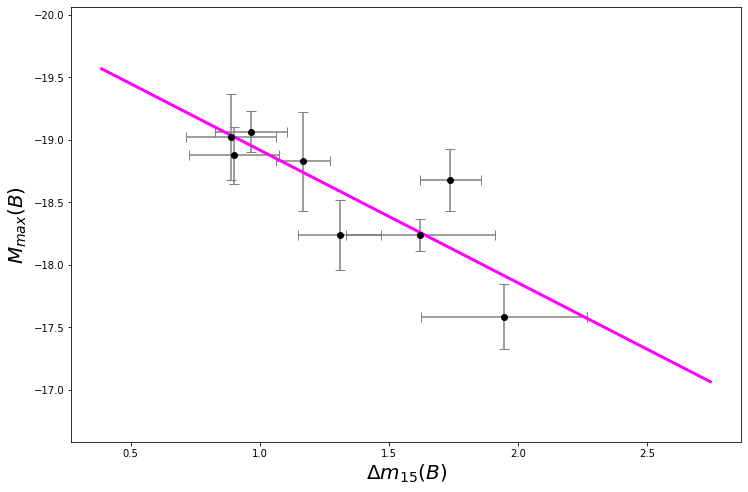

In [16]:
#fitting the plot of M_max(B) vs delta m_15(B) 
fit, var = curve_fit(lin_func, unumpy.nominal_values(m_15B), unumpy.nominal_values(M_B), p0 = [0.5, 31], sigma = unumpy.std_devs(M_B)) #fitting luminosity decline curve
slope = fit[0]

#array for which to plot fit over
x = np.linspace(unumpy.nominal_values(m_15B).min()-0.5, unumpy.nominal_values(m_15B).max()+0.8, 100)

#plotting luminosity decline relation
fig4, ax = plt.subplots(figsize = (12,8))
ax.errorbar(unumpy.nominal_values(m_15B), unumpy.nominal_values(M_B), xerr = unumpy.std_devs(m_15B), yerr = unumpy.std_devs(M_B), fmt = 'k.', capsize = 5, markersize = 12, ecolor = 'grey')
ax.set_ylim(unumpy.nominal_values(M_B).max()+1, unumpy.nominal_values(M_B).min()-1)
ax.set_xlabel(r"$\Delta m_{15}(B)$", fontsize = 20)
ax.set_ylabel(r"$M_{max}(B)$", fontsize = 20)
ax.plot(x, np.poly1d(fit)(x), "magenta", lw = 3)

In [17]:
mB_crct = mb_corr(peak_B, slope, m_15B) #correcting B magnitudes using lum-decline slope

In [18]:
print("Name", "\t\t", "Peak B Mag", "\t", "m_15(B)", "\t", "d [Mpc]", "\t", "M_B", "\t\t","Corrected B")
print("==="*31)

for i in range(len(peak_B)):
    print(updated_names[i] + ":", "\t", f"{peak_B[i]:.2f}", "\t", m_15B[i], "\t", f"{distances[i]:.2f}", "\t", f"{M_B[i]:.2f}", "\t", f"{mB_crct[i]:.2f}")

Name 		 Peak B Mag 	 m_15(B) 	 d [Mpc] 	 M_B 		 Corrected B
sn1997E: 	 15.63+/-0.03 	 1.31+/-0.16 	 59.36+/-7.52 	 -18.24+/-0.28 	 15.41+/-0.16
sn1997bp: 	 14.09+/-0.01 	 1.17+/-0.11 	 38.30+/-6.95 	 -18.83+/-0.39 	 14.02+/-0.11
sn1998bp: 	 15.62+/-0.02 	 1.94+/-0.32 	 43.69+/-5.26 	 -17.58+/-0.26 	 14.72+/-0.34
sn1998es: 	 13.96+/-0.05 	 0.89+/-0.18 	 39.43+/-6.15 	 -19.02+/-0.34 	 14.19+/-0.15
sn1999aa: 	 14.89+/-0.07 	 0.90+/-0.17 	 56.61+/-5.65 	 -18.88+/-0.23 	 15.10+/-0.14
sn1999dq: 	 14.85+/-0.04 	 0.97+/-0.14 	 60.61+/-4.37 	 -19.06+/-0.16 	 14.99+/-0.12
sn2000cn: 	 16.78+/-0.05 	 1.62+/-0.29 	 100.76+/-5.42 	 -18.24+/-0.13 	 16.23+/-0.28
sn2000dk: 	 15.63+/-0.02 	 1.74+/-0.12 	 72.48+/-8.31 	 -18.68+/-0.25 	 14.95+/-0.12


In [19]:
fit1, var = curve_fit(lin_func, np.log10(sol*redshifts), unumpy.nominal_values(peak_B), sigma = unumpy.std_devs(peak_B)) #lin fit of uncorrected B_max
fit2, var2 = curve_fit(lin_func, np.log10(sol*redshifts), unumpy.nominal_values(mB_crct), sigma = unumpy.std_devs(mB_crct)) #lin fit of corrected B_max

uncorr_fit = np.poly1d(fit1)  #linear function with fit parameters for uncorrected peak B magnitudes
corr_fit = np.poly1d(fit2)    #linear function with fit parameters for corrected peak B magnitudes

r1 = residuals(unumpy.nominal_values(peak_B), uncorr_fit(np.log10(sol*redshifts))) #finding residuals of uncorrected B_max
r2 = residuals(unumpy.nominal_values(mB_crct), corr_fit(np.log10(sol*redshifts)))  #finding residuals of uncorrected B_max

chi1 = np.sum((r1/unumpy.std_devs(peak_B))**2) #chi sq of uncorrected B_max
chi2 = np.sum((r2/unumpy.std_devs(mB_crct))**2)#chi sq of corrected B_max

Text(4, 15, '$\\sigma = 0.26$\n$\\chi^2$ = 24.9')

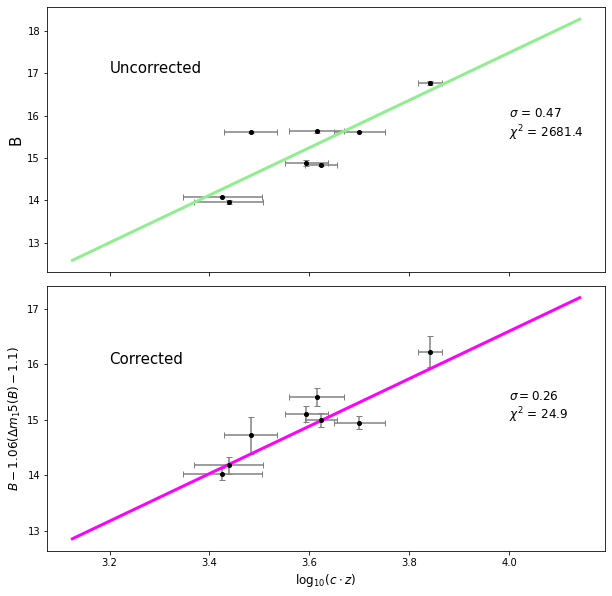

In [20]:
#plotting Hubble diagrams of peak apparent magnitude for both the uncorrected and corrected data with their 
#respective fits.

x= np.linspace(np.log10(sol*redshifts).min()-0.3, np.log10(sol*redshifts).max()+0.3)
texta = "Uncorrected"
textb = "Corrected"

fig5, (ax, ax1) = plt.subplots(nrows = 2, figsize = (10,10), sharex = True)
fig5.subplots_adjust(hspace = 0.05)

ax.errorbar(np.log10(sol*redshifts), unumpy.nominal_values(peak_B), fmt = 'k.', markersize = 8, yerr =  unumpy.std_devs(peak_B), xerr = 1/np.log(10)*error_redshifts/redshifts , capsize = 3, ecolor = "grey")
ax.set_ylabel("B", fontsize = 15)
ax.plot(x, uncorr_fit(x), "lightgreen", lw = 3)
ax.text(3.2,17, texta, fontsize = 15)
ax.text(4, 15.5, f"$\sigma $ = {np.std(r1):.2f}" + "\n" + f"$\chi^2$ = {chi1 :.1f}", fontsize = 12)

ax1.errorbar(np.log10(sol*redshifts), unumpy.nominal_values(mB_crct), fmt = "k.", markersize = 8, yerr =  (unumpy.std_devs(mB_crct)), xerr = 1/np.log(10)*error_redshifts/redshifts, capsize = 3, ecolor = "grey")
ax1.plot(x, corr_fit(x), "magenta", lw = 3)
ax1.set_ylabel(f"$B - {slope:.2f} (\Delta m_{15}(B)-1.1)$", fontsize = 12)
ax1.set_xlabel(r"$\log_{10}(c\cdot z)$", fontsize = 12)
ax1.text(3.2,16, textb, fontsize = 15)
ax1.text(4, 15, f"$\sigma = {np.std(r2):.2f}$" + "\n" + f"$\chi^2$ = {chi2:.3}", fontsize = 12)

# Part D - Hubble Diagram


In [21]:
partD_paths = get_filepaths('Data_for_upload2/')
partD_paths.pop(0)

#loading in data for part D using pandas
data_d = pd.read_csv(partD_paths[1])
data_d

,Name,zcmb,zhel,error,mb,error_mb,X1,error_X1,c,error_c,...,Mst_lower,logSFR,SFR_upper,SFR_lower,logsSFR,sSFR_upper,sSFR_lower,local_SFR,local_SFR_upper,local_SFR_lower
0,03D1au,0.503084,0.504300,0,23.001698,0.088031,1.273191,0.150058,-0.012353,0.030011,...,9.460,0.63,1.210,0.000,-8.920,-8.250,-9.680,NaN,NaN,NaN
1,03D1aw,0.580724,0.582000,0,23.573937,0.090132,0.974346,0.273823,-0.025076,0.036691,...,9.070,0.87,0.900,0.500,-8.340,-8.170,-8.750,NaN,NaN,NaN
2,03D1ax,0.494795,0.496000,0,22.960139,0.088110,-0.728837,0.102069,-0.099683,0.030305,...,11.530,<(-3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03D1bp,0.345928,0.347000,0,22.398137,0.087263,-1.155110,0.112834,-0.040581,0.026679,...,10.800,0.71,1.040,0.380,-10.140,-9.760,-10.670,NaN,NaN,NaN
4,03D1co,0.677662,0.679000,0,24.078115,0.098356,0.618820,0.404295,-0.039380,0.067403,...,8.630,-0.06,0.600,-0.490,-8.750,-8.030,-9.680,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,sn2007co,0.027064,0.026962,0,16.504006,0.141685,-0.137806,0.061153,0.105288,0.020382,...,-1.000,-99,-99.000,-99.000,-99.000,-99.000,-99.000,NaN,NaN,NaN
736,sn2007cq,0.025468,0.025918,0,15.797848,0.143429,-0.657941,0.115645,-0.060805,0.025820,...,8.323,-0.119,0.676,-0.463,-10.837,-8.320,-11.247,-1.873,-1.692,-2.201
737,sn2007f,0.023810,0.023590,0,15.895501,0.144315,0.618766,0.041400,-0.055411,0.026006,...,9.902,0.852,1.143,0.537,-9.175,-8.770,-9.531,-1.888,-1.714,-2.142
738,sn2007qe,0.023867,0.024000,0,16.068268,0.144350,0.760605,0.045650,0.052186,0.026200,...,7.863,-0.453,0.351,-1.177,-11.131,-8.320,-11.247,-4.010,-3.858,-4.307


In [22]:
#defining some constants and their respective errors

H0 = 70 # Hubble constant

alpha = 0.141
d_alpha = 0.006

beta = 3.101
d_beta = 0.075

Mb = -19.05  # absolute peak magnitude of a SNIa with x1=0 and c=0
dMb = 0.02   # error in this Mb

del_m = -0.07  # magnitude correction
d_delm = 0.02  # error in the magnitude correction

In [23]:
#extracting columns of the JLA data and storing in separate arrays

mb = np.array(data_d['mb'])  # apparent B band magnitude
d_mb = np.array(data_d['error_mb'])  # error in apparent B band magnitude

x1 = np.array(data_d['X1'])  # light curve width parameter
d_x1 = np.array(data_d['error_X1']) #error in light curve width parameter

c = np.array(data_d['c'])  # color term
d_c = np.array(data_d['error_c'])  # error in the color term 

LogMst = np.array(data_d['LogMst'])  # log10 of the stellar mass in solar masses
d_logMst = np.array(data_d['error_Mst'])  #error in this logMst

rs2 = np.array(data_d['zcmb'])  # zcmb redshifts

Text(0, 0.5, 'Distance Modulus')

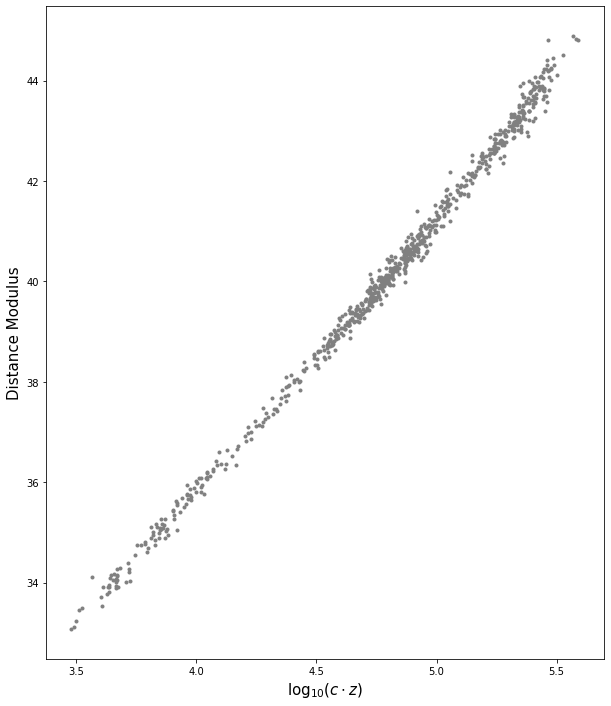

In [28]:
# Dictionary of inputs for the model
inputs = {'LogMst':LogMst, 'Mb': Mb, 'dMb':dMb, 'del_m': del_m, 'd_delm': d_delm, 
            'alpha': alpha, 'beta': beta, 'd_alpha': d_alpha, 'd_beta': d_beta, 
            'x1': x1, 'd_x1': d_x1, 'c': c, 'd_c': d_c, 'mb': mb, 'd_mb':d_mb} 

y, error_dmod = dmod_lc(**inputs) # values of distance modulae and their errors


#plotting Hubble Diagram with the JLA data
fig6, ax = plt.subplots(figsize = (10,12))
ax.plot(np.log10(sol * rs2), y, '.', color = 'gray')
ax.set_xlabel("$\log_{10}(c \cdot z)$", fontsize = 15)
ax.set_ylabel("Distance Modulus", fontsize = 15)

In [29]:
#creating conditions for the three different models of the universe

Univ_i = LambdaCDM(70, 0 ,0) #massless model of universe
d_i = Univ_i.luminosity_distance(rs2).to_value() #finding distances from redshifts for this model of universe
dmod_i = dmod_Mpc(d_i) #finding the distance modulus from the distances

Univ_ii = FlatLambdaCDM(70, 0.3)  #preferred model of the universe
d_ii = Univ_ii.luminosity_distance(rs2).to_value() #finding distances from redshifts for this model of universe
dmod_ii = dmod_Mpc(d_ii)   #finding the distance modulus from the distances

Univ_iii = FlatLambdaCDM(70, 1) #flat model of universe with no dark energy 
d_iii = Univ_iii.luminosity_distance(rs2).to_value() #finding distances from redshifts for this model of universe
dmod_iii = dmod_Mpc(d_iii) #finding the distance modulus from the distances

In [30]:
#calculating residuals of each model fit
res1 = residuals(dmod_i, y)
res2 = residuals(dmod_ii, y)
res3 = residuals(dmod_iii, y)

#calculating chi squared of each model fit
chisq1 = np.sum((res1/error_dmod)**2)
chisq2 = np.sum((res2/error_dmod)**2)
chisq3 = np.sum((res3/error_dmod)**2)


text1 = f"Massless Model:  $\sigma = {np.std(res1):.2f}$" + "$\quad$" + f"$\chi^2 = {chisq1:.0f}$"
text2 = f"Preferred Model:  $\sigma = {np.std(res2):.2f}$" + "$\quad$" + f"$\chi^2 = {chisq2:.0f}$"
text3 = f"No Dark Energy:  $\sigma = {np.std(res3):.2f}$" + "$\quad$" + f"$\chi^2 = {chisq3:.0f}$"

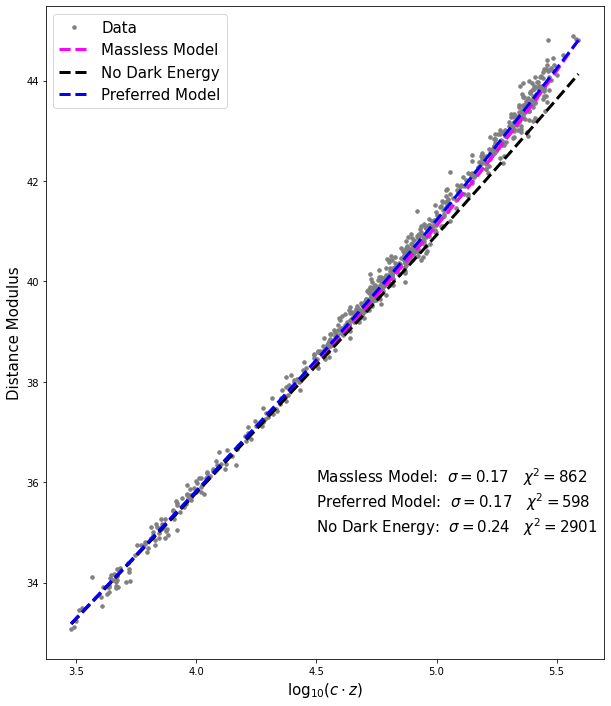

In [31]:
#plotting the three model fits and the JLA data
fig7, ax = plt.subplots(figsize = (10,12))

ax.plot(np.log10(rs2*sol), y, '.', color = 'gray',label = 'Data', markersize = 7)
ax.plot(np.log10(np.sort(rs2)*sol), np.sort(dmod_i), color = "magenta", label = 'Massless Model', ls = "dashed", lw = 3)
ax.plot(np.log10(np.sort(rs2)*sol), np.sort(dmod_iii), 'black', label = 'No Dark Energy', ls = "dashed", lw = 3)
ax.plot(np.log10(np.sort(rs2)*sol), np.sort(dmod_ii), 'blue', label = 'Preferred Model', ls = "dashed", lw = 3)

ax.set_xlabel("$\log_{10}(c \cdot z)$", fontsize = 15)
ax.set_ylabel("Distance Modulus", fontsize = 15)

ax.text(4.5, 35, text1 + "\n" + text2 + "\n" + text3, fontsize = 15)
ax.legend(fontsize = 15)

In [27]:
# fig1.savefig("spectra_plots.jpg", bbox_inches='tight')
# fig2.savefig("halpha_fit.jpg", bbox_inches = 'tight')
# fig3.savefig("lc_fit", bbox_inches = 'tight')
# fig4.savefig("lum_decline", bbox_inches = 'tight')
# fig5.savefig("hubble1", bbox_inches = 'tight')
# fig6.savefig("hubble2.jpg", bbox_inches = 'tight')
# fig7.savefig("hubble3.jpg", bbox_inches = 'tight')